In [6]:
%matplotlib inline


# Difference between magnetic dipole and loop sources

In this example we look at the differences between an electric loop loop, which
results in a magnetic source, and a magnetic dipole source.

The derivation of the electromagnetic field in Hunziker et al. (2015) is for
electric and magnetic point-dipole sources and receivers. The magnetic field
due to a magnetic source ($mm$) is obtain from the electric field due to
an electric source ($ee$) using the duality principle, given in their
Equation (11),

\begin{align}\hat{G}^{mm}_{pq}(\mathbf{x}, \mathbf{x'}, s, \eta_{kr}, \zeta_{ij}) =
    -\hat{G}^{ee}_{pq}(\mathbf{x}, \mathbf{x'}, s, -\zeta_{kr}, -\eta_{ij}) \,
    . \qquad (1)\end{align}

Without going into the details of the different parameters, we can focus on the
difference between the $mm$ and $ee$ fields for a homogeneous,
isotropic fullspace by simplifying this further to

\begin{align}\mathbf{G}^{mm}_\text{dip-dip} = \frac{\eta}{\zeta}\mathbf{G}^{ee} \quad
    \xrightarrow{\text{diff. approx}} \quad \frac{\sigma}{\mathrm{i}\omega
    \mu}\mathbf{G}^{ee}_\text{dip-dip} \, . \qquad (2)\end{align}

Here, $\sigma$ is conductivity (S/m), $\omega=2\pi f$ is angular
frequency (Hz), and $\mu$ is the magnetic permeability (H/m). So from
Equation (2) we see that the $mm$  field differs from the $ee$
field by a factor $\sigma/(\mathrm{i}\omega\mu)$.

A magnetic dipole source has a moment of $I^mds$; however, a magnetic
dipole source is basically never used in geophysics. Instead a loop of an
electric wire is used, which generates a magnetic field. The moment generated
by this loop is given by $I^m = \mathrm{i}\omega\mu N A I^e$, where
$A$ is the area of the loop (m$^2$), and $N$ the number of
turns of the loop. So the difference between a unit magnetic dipole and a unit
loop ($A=1, N=1$) is the factor $\mathrm{i}\omega\mu$, hence
Equation (2) becomes

\begin{align}\mathbf{G}^{mm}_\text{loop-dip} =
    \mathrm{i}\omega\mu\mathbf{G}^{mm}_\text{dip-dip} =
    \sigma\,\mathbf{G}^{ee}_\text{dip-dip} \, . \qquad (3)\end{align}

This notebook shows this relation in the frequency domain, as well as for
impulse, step-on, and step-off responses in the time domain.

We can actually model an **electric loop** instead of adjusting the magnetic
dipole solution to correspond to a loop source. This is shown in the second
part of the notebook.

**References**

- Hunziker, J., J. Thorbecke, and E. Slob, 2015, The electromagnetic response
  in a layered vertical transverse isotropic medium: A new look at an old
  problem: Geophysics, 80(1), F1–F18; DOI: `10.1190/geo2013-0411.1
  <https://doi.org/10.1190/geo2013-0411.1>`_.


In [2]:
import empymod
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

## 1. Using the magnetic dipole solution

### Survey parameters

- Homogenous fullspace of $\sigma$ = 0.01 S/m.
- Source at the origin, x-directed.
- Inline receiver with offset of 100 m, x-directed.



In [3]:
freq = np.logspace(-1, 5, 301)  # Frequencies (Hz)
time = np.logspace(-6, 0, 301)  # Times (s)
src = [0, 0, 0, 0, 0]    # x-dir. source at the origin [x, y, z, azimuth, dip]
rec = [100, 0, 0, 0, 0]  # x-dir. receiver 100m away from source, inline
cond = 0.01              # Conductivity (S/m)

### Computation using ``empymod``



In [4]:
# Collect common parameters
inp = {'src': src, 'rec': rec, 'depth': [], 'res': 1/cond, 'verb': 1}

# Frequency domain
inp['freqtime'] = freq
fee_dip_dip = empymod.bipole(**inp)
fmm_dip_dip = empymod.bipole(msrc=True, mrec=True, **inp)
f_loo_dip = empymod.loop(**inp)

# Time domain
inp['freqtime'] = time

# ee
ee_dip_dip_of = empymod.bipole(signal=-1, **inp)
ee_dip_dip_im = empymod.bipole(signal=0, **inp)
ee_dip_dip_on = empymod.bipole(signal=1, **inp)

# mm dip-dip
dip_dip_of = empymod.bipole(signal=-1, msrc=True, mrec=True, **inp)
dip_dip_im = empymod.bipole(signal=0, msrc=True, mrec=True, **inp)
dip_dip_on = empymod.bipole(signal=1, msrc=True, mrec=True, **inp)

# mm loop-dip
loo_dip_of = empymod.loop(signal=-1, **inp)
loo_dip_im = empymod.loop(signal=0, **inp)
loo_dip_on = empymod.loop(signal=1, **inp)

### Plot the result



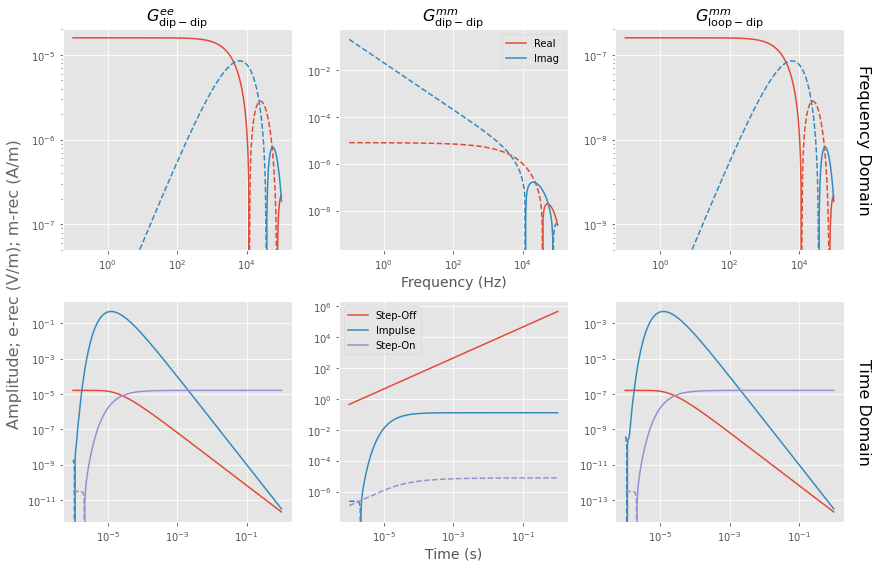

In [7]:
fs = 16  # Fontsize

# Figure
fig = plt.figure(figsize=(12, 8))

# Frequency Domain
plt.subplot(231)
plt.title(r'$G^{ee}_{\rm{dip-dip}}$', fontsize=fs)
plt.plot(freq, fee_dip_dip.real, 'C0-', label='Real')
plt.plot(freq, -fee_dip_dip.real, 'C0--')
plt.plot(freq, fee_dip_dip.imag, 'C1-', label='Imag')
plt.plot(freq, -fee_dip_dip.imag, 'C1--')
plt.xscale('log')
plt.yscale('log')
plt.ylim([5e-8, 2e-5])

ax1 = plt.subplot(232)
plt.title(r'$G^{mm}_{\rm{dip-dip}}$', fontsize=fs)
plt.plot(freq, fmm_dip_dip.real, 'C0-', label='Real')
plt.plot(freq, -fmm_dip_dip.real, 'C0--')
plt.plot(freq, fmm_dip_dip.imag, 'C1-', label='Imag')
plt.plot(freq, -fmm_dip_dip.imag, 'C1--')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Frequency (Hz)', fontsize=fs-2)
plt.legend()

plt.subplot(233)
plt.title(r'$G^{mm}_{\rm{loop-dip}}$', fontsize=fs)
plt.plot(freq, f_loo_dip.real, 'C0-', label='Real')
plt.plot(freq, -f_loo_dip.real, 'C0--')
plt.plot(freq, f_loo_dip.imag, 'C1-', label='Imag')
plt.plot(freq, -f_loo_dip.imag, 'C1--')
plt.xscale('log')
plt.yscale('log')
plt.ylim([5e-10, 2e-7])

plt.text(1.05, 0.5, "Frequency Domain", {'fontsize': fs},
         horizontalalignment='left', verticalalignment='center',
         rotation=-90, clip_on=False, transform=plt.gca().transAxes)

# Time Domain
plt.subplot(234)
plt.plot(time, ee_dip_dip_of, 'C0-', label='Step-Off')
plt.plot(time, -ee_dip_dip_of, 'C0--')
plt.plot(time, ee_dip_dip_im, 'C1-', label='Impulse')
plt.plot(time, -ee_dip_dip_im, 'C1--')
plt.plot(time, ee_dip_dip_on, 'C2-', label='Step-On')
plt.plot(time, -ee_dip_dip_on, 'C2--')
plt.xscale('log')
plt.yscale('log')

plt.subplot(235)
plt.plot(time, dip_dip_of, 'C0-', label='Step-Off')
plt.plot(time, -dip_dip_of, 'C0--')
plt.plot(time, dip_dip_im, 'C1-', label='Impulse')
plt.plot(time, -dip_dip_im, 'C1--')
plt.plot(time, dip_dip_on, 'C2-', label='Step-On')
plt.plot(time, -dip_dip_on, 'C2--')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Time (s)', fontsize=fs-2)
plt.legend()

plt.subplot(236)
plt.plot(time, loo_dip_of, 'C0-', label='Step-Off')
plt.plot(time, -loo_dip_of, 'C0--')
plt.plot(time, loo_dip_im, 'C1-', label='Impulse')
plt.plot(time, -loo_dip_im, 'C1--')
plt.plot(time, loo_dip_on, 'C2-', label='Step-On')
plt.plot(time, -loo_dip_on, 'C2--')
plt.xscale('log')
plt.yscale('log')

plt.text(1.05, 0.5, "Time Domain", {'fontsize': fs},
         horizontalalignment='left', verticalalignment='center',
         rotation=-90, clip_on=False, transform=plt.gca().transAxes)

fig.text(-0.01, 0.5, 'Amplitude; e-rec (V/m); m-rec (A/m)',
         va='center', rotation='vertical', fontsize=fs, color='.4')

plt.tight_layout()
plt.show()

The figure shows the main points of Equations (2) and (3):

- The magnetic dipole-dipole response differs by a factor
  $\sigma/(\mathrm{i}\omega\mu)$ from the electric dipole-dipole
  response. That means for the time-domain that the magnetic response looks
  more like the time derivative of the electric response (e.g., the magnetic
  impulse responses resembles the electric step-on response).
- The magnetic loop-dipole response differs only by $\sigma$ from the
  electric dipole-dipole response, hence a factor of 0.01.

The units of the response only depend on the receiver, what the receiver
actually measures. So if we change the source from a dipole to a loop it does
not change the units of the received responses.

## 2. Using an electric loop

We can use ``empymod`` to model arbitrary shaped sources by simply adding
point dipole sources together. This is what ``empymod`` does internally to
model a finite length dipole (``empymod.bipole``), where it uses a Gaussian
quadrature with a few points.

Here, we are going to compare the result from ``loop``, as presented above,
with two different simulations of an electric loop source, assuming a square
loop which sides are 1 m long, so the area correspond to one square meter.

### Plotting routines



In [ ]:
def plot_result(data1, data2, x, title, vmin=-15., vmax=-7., rx=0):
    """Plot result."""
    fig = plt.figure(figsize=(18, 10))

    def setplot(name):
        """Plot settings"""
        plt.title(name)
        plt.xlim(rx.min(), rx.max())
        plt.ylim(rx.min(), rx.max())
        plt.axis("equal")

    # Plot Re(data)
    ax1 = plt.subplot(231)
    setplot(r"(a) |Re(magn.dip*iwu)|")
    cf0 = plt.pcolormesh(rx, rx, np.log10(np.abs(data1.real)), linewidth=0,
                         rasterized=True, cmap="viridis", vmin=vmin, vmax=vmax,
                         shading='nearest')

    ax2 = plt.subplot(232)
    setplot(r"(b) |Re(el. square)|")
    plt.pcolormesh(rx, rx, np.log10(np.abs(data2.real)), linewidth=0,
                   rasterized=True, cmap="viridis", vmin=vmin, vmax=vmax,
                   shading='nearest')

    ax3 = plt.subplot(233)
    setplot(r"(c) Error real part")
    error_r = np.abs((data1.real-data2.real)/data1.real)*100
    cf2 = plt.pcolormesh(rx, rx, np.log10(error_r), vmin=-2, vmax=2,
                         linewidth=0, rasterized=True,
                         cmap=plt.cm.get_cmap("RdBu_r", 8),
                         shading='nearest')

    # Plot Im(data)
    ax4 = plt.subplot(234)
    setplot(r"(d) |Im(magn.dip*iwu)|")
    plt.pcolormesh(rx, rx, np.log10(np.abs(data1.imag)), linewidth=0,
                   rasterized=True, cmap="viridis", vmin=vmin, vmax=vmax,
                   shading='nearest')

    ax5 = plt.subplot(235)
    setplot(r"(e) |Im(el. square)|")
    plt.pcolormesh(rx, rx, np.log10(np.abs(data2.imag)), linewidth=0,
                   rasterized=True, cmap="viridis", vmin=vmin, vmax=vmax,
                   shading='nearest')

    ax6 = plt.subplot(236)
    setplot(r"(f) Error imag part")
    error_i = np.abs((data1.imag-data2.imag)/data1.imag)*100
    plt.pcolormesh(rx, rx, np.log10(error_i), vmin=-2, vmax=2,
                   linewidth=0, rasterized=True,
                   cmap=plt.cm.get_cmap("RdBu_r", 8),
                   shading='nearest')

    # Colorbars
    fig.colorbar(cf0, ax=[ax1, ax2, ax3], label=r"$\log_{10}$ Amplitude (A/m)")
    cbar = fig.colorbar(cf2, ax=[ax4, ax5, ax6], label=r"Relative Error")
    cbar.set_ticks([-2, -1, 0, 1, 2])
    cbar.ax.set_yticklabels([r"$0.01\,\%$", r"$0.1\,\%$", r"$1\,\%$",
                             r"$10\,\%$", r"$100\,\%$"])

    # Axis label
    fig.text(0.4, 0.05, "Inline Offset (m)", fontsize=14)
    fig.text(0.08, 0.5, 'Crossline Offset (m)', rotation=90, fontsize=14)

    # Title
    fig.suptitle(title, y=.95, fontsize=20)
    plt.show()

### Model parameters

- Resistivity: $1 \Omega$ m fullspace

### Survey

- Source at [0, 0, 0]
- Receivers at [x, y, 10]
- frequencies: 100 Hz.
- Offsets: -250 m - 250 m



In [ ]:
# Survey parameters
x = ((np.arange(502))-250.5)
rx = np.repeat([x, ], np.size(x), axis=0)
ry = rx.transpose()
rxx = rx.ravel()
ryy = ry.ravel()

# Model
model = {
    'depth': [],        # Fullspace
    'res': 1.,          # 1 Ohm.m
    'freqtime': 100,    # 100 Hz
    'htarg': {'pts_per_dec': -1},
    'verb': 1,
}

### Compute ``empymod.loop`` result



In [ ]:
epm_loop = empymod.loop(src=[0, 0, 0, 0, 90], rec=[rxx, ryy, 10, 0, 0],
                        **model).reshape(np.shape(rx))

### 2.1 Point dipoles at (x, y) using ``empymod.dipole``

  - (0.5, 0), ab=42
  - (0, 0.5), ab=41
  - (-0.5, 0), ab=-42
  - (0, -0.5), ab=-41




In [ ]:
rec_dip = [rxx, ryy, 10]

square_pts = +empymod.dipole(src=[+0.5, +0.0, 0], rec=rec_dip, ab=42,
                             **model).reshape(np.shape(rx))
square_pts += empymod.dipole(src=[+0.0, +0.5, 0], rec=rec_dip, ab=41,
                             **model).reshape(np.shape(rx))
square_pts -= empymod.dipole(src=[-0.5, +0.0, 0], rec=rec_dip, ab=42,
                             **model).reshape(np.shape(rx))
square_pts -= empymod.dipole(src=[+0.0, -0.5, 0], rec=rec_dip, ab=41,
                             **model).reshape(np.shape(rx))

plot_result(epm_loop, square_pts, x, 'Loop made of four points',
            vmin=-13, vmax=-5, rx=x)

### 2.2 Finite length dipoles using ``empymod.bipole``

Each simulated with a 5pt Gaussian quadrature. The dipoles are:

  - (-0.5, -0.5) to (+0.5, -0.5)
  - (+0.5, -0.5) to (+0.5, +0.5)
  - (+0.5, +0.5) to (-0.5, +0.5)
  - (-0.5, +0.5) to (-0.5, -0.5)



In [ ]:
inp_dip = {
    'rec': [rxx, ryy, 10, 0, 0],
    'mrec': True,
    'srcpts': 5  # Gaussian quadr. with 5 pts to simulate a finite length dip.
}

square_dip = +empymod.bipole(src=[+0.5, +0.5, -0.5, +0.5, 0, 0],
                             **inp_dip, **model)
square_dip += empymod.bipole(src=[+0.5, -0.5, +0.5, +0.5, 0, 0],
                             **inp_dip, **model)
square_dip += empymod.bipole(src=[-0.5, -0.5, +0.5, -0.5, 0, 0],
                             **inp_dip, **model)
square_dip += empymod.bipole(src=[-0.5, +0.5, -0.5, -0.5, 0, 0],
                             **inp_dip, **model)
square_dip = square_dip.reshape(np.shape(rx))

plot_result(epm_loop, square_dip, x, 'Loop made of four dipoles',
            vmin=-13, vmax=-5, rx=x)

Close to the source  the results between

- (1) a magnetic dipole,
- (2) an electric loop conisting of four point sources, and
- (3) an electric loop consisting of four finite length dipoles,

differ, as expected. However, for the vast majority they are identical. Skin
depth for our example with $\rho=1\Omega$ m and $f=100$ Hz is
roughly 50 m, so the results are basically identical for 4-5 skin depths,
after which the signal is very low.



In [ ]:
empymod.Report()